###ICE 3

# Knowledge Inference

The purpose for the assessment technologies in learning is 
to use a series of well-designed challenges/tasks/questions to infer students' 
mastery of knowledge or cognitive capacity in general.

knowledge tracing for assess the whether students acquire the knowledge or not. 
using the BKT model 

# pyBKT: model creation, fitting, prediction, evaluation and crossvalidation. 

In [1]:
# Install pyBKT from pip!
!pip install pyBKT

# Import all required packages including pyBKT.models.Model!
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt

In [2]:
#Initialize the model with an optional seed and number of fit initializations.
model = Model(seed = 42, num_fits = 1)

In [3]:
#given dataset 
#Note that the column names describing the student ID, the problem name, 
#the response's correctness and skill name all differ between the two datasets.
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [4]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
print(ct_df.columns)
ct_df.head(5)

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5


In [5]:
as_df = pd.read_csv('as.csv', encoding = 'latin', low_memory = False)
print(as_df.columns)
as_df.head(5)

Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.00000
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.00000
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.00000
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.00000
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.00000,3,3.00000


In [6]:
model.fit(data_path = 'ct.csv')

In [7]:
# train on multiple skills specified by a list of skill names
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Plot non-terminating improper fraction
Plot terminating proper fraction
Calculate part in proportion with fractions
Calculate total in proportion with fractions


In [8]:
# Evaluate with the default RMSE then specify AUC.
#valuate on the trained skills for any test data located in a Pandas DataFrame or in a file. 
#In this case, we will just use training data, so this will display the training error. 
#Note that the default metric displayed is 
#RMSE. pyBKT supports AUC, RMSE, and accuracy as metrics by default.
model.fit(data_path = 'ct.csv')
training_rmse = model.evaluate(data = ct_df)
training_auc = model.evaluate(data_path = "ct.csv", metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.453993
Training AUC: 0.707281


In [9]:
# We can even define our own metric!
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """ 
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.412815


# Model Prediction

pyBKT can return predictions on a test set given a Pandas DataFrame or a file conaining test data. 
If pyBKT is asked for predictions on skills for which it has not trained a model,
it will output a best effort guess of 0.5 for both the correct and state predictions.

We will be using the training dataset again for testing purposes.

In [10]:
# Note again that the REGEX expression below trains BKT models on all
# skills containing the word fraction!
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
preds = model.predict(data_path = 'ct.csv')
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.49101,0.58368
774,0I891Gg,Plot imperfect radical,0,0.50000,0.50000
775,0I891Gg,Plot terminating proper fraction,0,0.48898,0.48532
776,0I891Gg,Plot pi,1,0.50000,0.50000
777,0I891Gg,Plot terminating proper fraction,1,0.44373,0.37243


In [11]:
# Let's sanity check that we have only trained on the skills that we 
# specified in the call to fit! Note that while it is possible for a 
# BKT prediction to be 0.5 exactly, it is unlikely.
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Plot non-terminating improper fraction',
       'Plot terminating proper fraction',
       'Calculate part in proportion with fractions',
       'Calculate total in proportion with fractions'], dtype=object)

In [12]:
# Let's manually calculate the RMSE of the correct predictions 
# and ensure that it is the same as a call to the evaluate function.
def rmse(y_true, y_pred):
  """ Returns the root-mean squared error. """
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Filter out the data for which we did not train!
preds_filtered = preds[preds['KC(Default)'].str.contains('fraction')]
manual_training_rmse = rmse(preds_filtered['Correct First Attempt'],
                            preds_filtered['correct_predictions'])
manual_training_rmse

0.4409276870044463

In [13]:
# We use model.evaluate to accomplish the same thing!
# You should receive an RMSE that is identical to the above
# manually calculated RMSE.
model.evaluate(data = ct_df)

0.4409276870044377

# Model Cross-Validation and Variants

Crossvalidation is offered as a blackbox function similar to a combination of fit and evaluate 

Crossvalidation is offered as a blackbox function similar to a combination of fit 
and evaluate that accepts a particular number of folds, a seed, and a metric 
(either one of the 3 provided that are 'rmse', 'auc' or 'accuracy' or a custom Python function taking 2 arguments). 
Similar arguments for the model types, data path/data, and skill names are accepted as with the fit function.

In [14]:
# Note that folds is an optional parameter as well as the model 
# variant, seed, and crossvalidated metric.
# By default, we crossvalidate on all skills separately.
model.crossvalidate(data_path = 'ct.csv', folds = 5)

,rmse
skill,
Plot non-terminating improper fraction,0.48524
Plot imperfect radical,0.43536
Plot terminating proper fraction,0.49847
Plot pi,0.45933
Plot whole number,0.28978
Plot decimal - thousandths,0.47282
Calculate unit rate,0.48285
Calculate part in proportion with fractions,0.42750
Calculate total in proportion with fractions,0.42448


We explore all the model variants offered within pyBKT for one particular skill 
(Calculations with Similar Figures) using cross-validation since it provides a much better evaluation 
of true model performance during test time than the training loss!

In [15]:
# Try this with a different skill or metric by replacing the lines below.
skill = 'Calculations with Similar Figures'
metric = 'auc'

simple_cv = model.crossvalidate(data = as_df, skills = skill, 
                                metric = metric)
simple_cv

,auc
skill,
Calculations with Similar Figures,0.59732


The multigs model fits a different guess/slip rate for each class. 
Note that by default, for the CognitiveTutor data, the guess and slip classes will be specified by the template_id. pyBKT will be able to infer the column names for AS/CT type datasets, 
but you can specify a custom column mapping (discussed in later cells).

In [16]:
multigs_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,auc
skill,
Calculations with Similar Figures,0.63938


The multilearn model fits a different learn rate (and forget rate if enabled) rate for each class specified. 
Note that the learn classes are specified by the template_id column 
by default for the Assistments dataset.

In [17]:
multilearn_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multilearn = True, forgets = True, 
                                    metric = metric)
multilearn_cv

,auc
skill,
Calculations with Similar Figures,0.62995


The multilearn model fits a different learn (and forget if enabled) rate for each class, 
and the multipair model generates a different learn rate based on each consecutive pair of classes.

In [18]:
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
multipair_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,auc
skill,
Calculations with Similar Figures,0.60286
Calculations with Similar Figures,0.58593


The best performing models are typically those that combine several useful variants such as the multilearn and multiguess/slip class variants. We will enable the forgets parameter as well. 
Try testing with other skills and see whether this holds true for the general case.

In [19]:
# We combine the fifth parameter, forgets, with the previous multilearn
# and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,auc
skill,
Calculations with Similar Figures,0.61911


# Model Parameter Initialization and Visualization


#We can initialize any of the model parameters for a particular skill's BKT model before training using model.coef_. Similar to SciKit Learn, model.coef_ is a way to initialize model parameters and view them after they are fitted.

In [20]:
# We initialize the prior parameter to 1e-3 for the Box and Whisker 
# skill.
#
# Note that if we are training a KT-IDEM (multiguess/slip) model,
# we need to have len(guesses) == len(slips) == # of G/S classes.
# Similarly, for multilearn models, you need len(forgets) == len(guesses)
# corresponding to the number of learn classes.
skill = 'Box and Whisker'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Box and Whisker': {'prior': 1e-40}}

In [21]:
# Train the model with the pre-initialized parameters.
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
low_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.631312


In [22]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
normal_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.003791
Training AUC: 0.635259


In [23]:
model.fit(data_path = 'as.csv', skills = skill,
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

value
skill           param   class          
Box and Whisker prior   default 0.00237
                learns  30059   0.04267
                        30060   0.04195
                        30799   0.04070
                        63446   0.04067
                        63447   0.03802
                        63448   0.03646
                guesses 30059   0.82712
                        30060   0.67325
                        30799   0.72964
                        63446   0.72344
                        63447   0.57918
                        63448   0.74694
                slips   30059   0.00000
                        30060   0.00000
                        30799   0.00000
                        63446   0.00000
                        63447   0.00000
                        63448   0.00000
                forgets 30059   0.57196
                        30060   0.56188
                        30799   0.55492
                        63446   0.56647
                        63447   0.56875
                        63448   0.59615

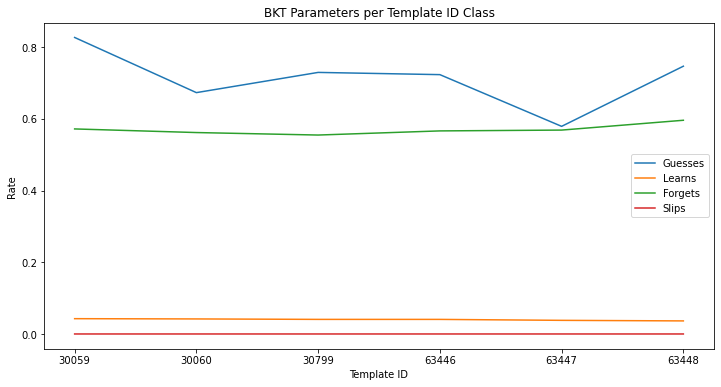

In [24]:
# We will get warnings for using indexing past lexsort. That's fine,
# and we will disable these warnings.
import warnings
warnings.simplefilter(action='ignore')

# Plot the learns, forgets, slips and guesses for each of the classes.
params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class')
plt.legend();

# Extended Data and Model Configuration

Models can get excessively long, whether it's due to the number of model variants used, 
the number of folds/seed/metric for crossvalidation, data path length, etc.

In [25]:
#describes all the parameters we will pass in
config = {'multigs': True,
          'multilearn': True,
          'skills': ['Box and Whisker', 'Circle Graph'],
          'forgets': True,
          'metric': 'accuracy',
          'folds': 4,
          'seed': 42 * 42}
model.crossvalidate(data_path = 'as.csv', **config)

,accuracy
skill,
Circle Graph,0.66684
Box and Whisker,0.75569


In [26]:
# Note that this means that the order_id specified by the column named
# custom_order in our custom dataset, the skill_name is specified by the 
# custom_skill column in our custom dataset, and so on.
defaults = {'order_id': 'custom_order', 
            'skill_name': 'custom_skill', 
            'correct': 'custom_answer'}

# This defaults dictionary can also contain columns specifying
# what columns correspond to the desired guess/slip classes, etc.
defaults['multigs'] = 'custom_gs_classes'

# Our final column mapping is:
defaults

{'order_id': 'custom_order',
 'skill_name': 'custom_skill',
 'correct': 'custom_answer',
 'multigs': 'custom_gs_classes'}

In [27]:
# We'll use this mapping with the modified CogTutor dataset with the names
# we chose for the columns.
#
# Note that Row is the order ID (order_id), KC(Default) is the 
# skill name (skill_name), Correct First Attempt is correct, and 
# Problem Name is the corresponding guess/slip class column.

columns = ['Row', 'Anon Student Id', 'KC(Default)', 
           'Correct First Attempt', 'Problem Name']
my_df = ct_df[columns]
my_df.columns = ['custom_order', 'Anon Student Id',
                 'custom_skill', 'custom_answer',
                 'custom_gs_classes']
my_df['custom_skill'] += ' (Custom)'
my_df.head(5)

,custom_order,Anon Student Id,custom_skill,custom_answer,custom_gs_classes
773,112149,0I891Gg,Plot non-terminating improper fraction (Custom),0,RATIONAL1-014
774,112151,0I891Gg,Plot imperfect radical (Custom),0,RATIONAL1-041
775,112156,0I891Gg,Plot terminating proper fraction (Custom),0,RATIONAL1-104
776,112157,0I891Gg,Plot pi (Custom),1,RATIONAL1-122
777,112159,0I891Gg,Plot terminating proper fraction (Custom),1,RATIONAL1-180


In [28]:
# We can crossvalidate/fit given these default column mappings.
model.crossvalidate(data = my_df, metric = 'auc',
                    defaults = defaults)

,auc
skill,
Plot non-terminating improper fraction (Custom),0.64737
Plot imperfect radical (Custom),0.63613
Plot terminating proper fraction (Custom),0.56716
Plot pi (Custom),0.56102
Plot whole number (Custom),0.52645
Plot decimal - thousandths (Custom),0.62942
Calculate unit rate (Custom),0.58190
Calculate part in proportion with fractions (Custom),0.67440
Calculate total in proportion with fractions (Custom),0.70692
